#### Modified files are:

in task.py these functions were added:

In [ ]:
def get_obs(state, lm_coords):

    assert isinstance(state, np.ndarray)

    assert state.shape == (3,)

    mx, my = lm_coords
    x, y, theta = state

    dx = mx - x
    dy = my - y
    q = dx ** 2 + dy ** 2

    bearing = np.arctan2(dy, dx) - theta

    return np.array([np.sqrt(q), wrap_angle(bearing)])


# L
def get_invh_prime_wrt_state(state, obs):

    distance, bearing = obs[0], obs[1]
    theta = state[2]

    return np.array([[1, 0, -distance*np.sin(bearing + theta)], 
                     [0, 1, distance*np.cos(bearing + theta)]])


# W
def get_invh_prime_wrt_obs(state, obs):

    distance, bearing = obs[0], obs[1]
    theta = state[2]

    return np.array([[np.cos(bearing + theta), -distance*np.sin(bearing + theta)], 
                     [np.sin(bearing + theta), distance*np.cos(bearing + theta)]])


def get_inverse_observation(state, obs):

    distance, bearing = obs[0], obs[1]
    x, y, theta = state[0], state[1], state[2]

    mx = x + distance * np.cos(bearing + theta)
    my = y + distance * np.sin(bearing + theta)

    return np.array([mx, my])


def get_obs_jcb_wrt_state(state, lm):

    x, y, theta = state
    
    mx = lm[0]
    my = lm[1]
    q = (mx - x)**2 + (my - y)**2
    H = np.array([[-(mx - x) / np.sqrt(q), -(my - y) / np.sqrt(q), 0], 
                   [(my - y) / q, -(mx - x) / q, -1]])

    return H

in run.py these lines were added:

In [ ]:
ekf_slam = EKF_SLAM(initial_state, Q, alphas) # added this line

robot_mu = []
robot_Sigma = []
landmarks_mu = []
landmarks_Sigma = []

landmarks = ekf_slam.known_landmarks
n_landmarks = args.num_landmarks_per_side * 2

landmark_mu = [None] * n_landmarks
landmark_Sigma = [None] * n_landmarks


# *************************

    # TODO SLAM predict(u)
mu_bar, Sigma_bar = ekf_slam.ekfPrediction(u) # added this line

# TODO SLAM update
mu, Sigma = ekf_slam.ekfUpdate(z, field_map) # added this line


for (i, lm) in enumerate(landmarks):
    ind = 2 * i + 3
    landmark_mu[int(lm)] = mu[ind:ind + 2]
    landmark_Sigma[int(lm)] = Sigma[ind:ind + 2, ind:ind + 2]

robot_mu.append(mu[:3])
robot_Sigma.append(Sigma[:3, :3])
landmarks_mu.append(landmark_mu)
landmarks_Sigma.append(landmark_Sigma)

ekf_robot_trajectory = np.array(robot_mu)
ekf_robot_trajectory_Sigma = np.array(robot_Sigma)
ekf_landmarks_coords = np.array(landmarks_mu)
ekf_landmarks_cov = np.array(landmarks_Sigma)


# *************************


# TODO plot SLAM solution
plot_landmarks(ekf_landmarks_coords[t], ekf_landmarks_cov[t])

plt.plot(ekf_robot_trajectory[1:t + 1, 0], ekf_robot_trajectory[1:t + 1, 1], 'b')

plot2dcov(ekf_robot_trajectory[t, :2], ekf_robot_trajectory_Sigma[t, :2, :2], 'b')



from scratch was created file ekfSLAM.py

#### Here is a plot of a final map

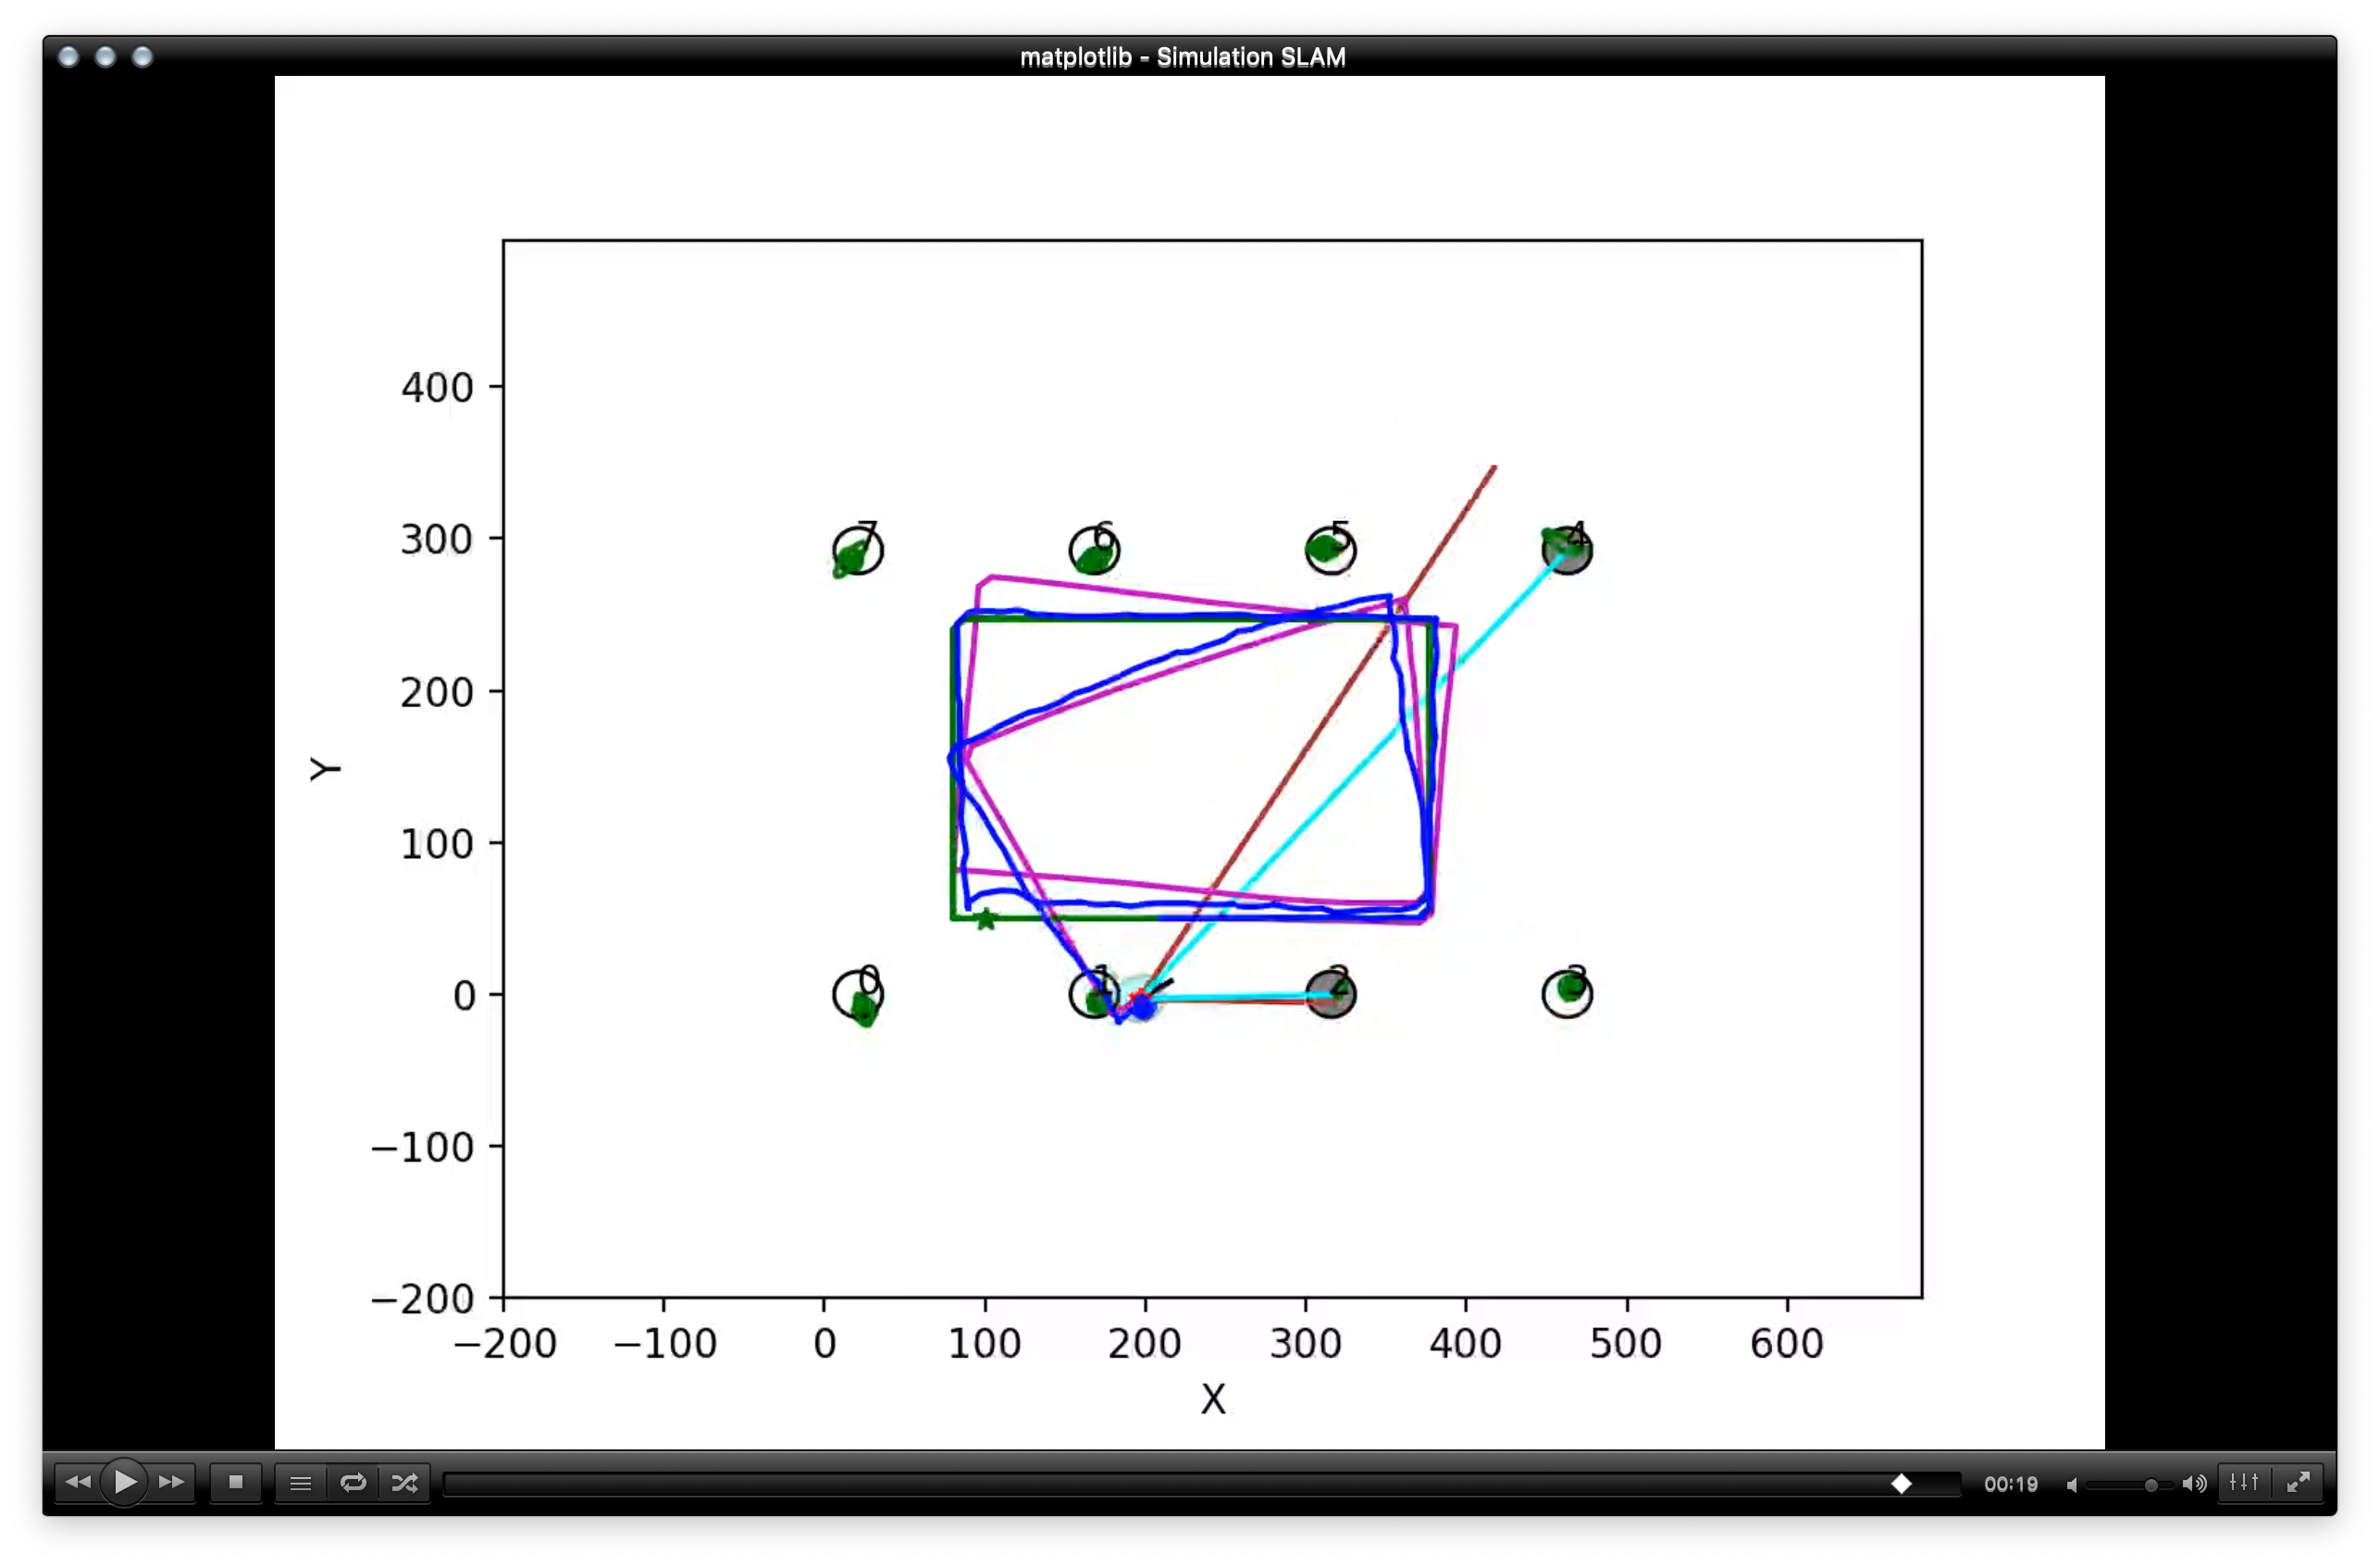